<a href="https://colab.research.google.com/github/star1sh/AI_seocho/blob/main/titanic(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Mahine with titanic

## 1. Import packages
### 필요한 패키지들 import
- np, plt, pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset
- 파일 경로 각자 맞춰서 설정

In [ ]:
/content/drive/MyDrive/titanic_workplace/07_02_lab_ex/titanic

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#colab에서 mount해서 가져오기.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/titanic_workplace/07_02_lab_ex/titanic')
#상대경로
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#절대경로
df = pd.read_csv("/content/drive/MyDrive/titanic_workplace/07_02_lab_ex/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp:	# of siblings / spouses aboard the Titanic
- parch:	# of parents / children aboard the Titanic
- ticket:	Ticket number
- cabin:	Cabin number
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [ ]:
# 불러들여온 csv 파일 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### HINT : 그래프를 이용한 데이터 분석
- 아래 함수를 이용, 각 컬럼간의 상관관계를 분석
- matplotlib, seaborn 라이브러리를 활용
- Survived  컬럼과 다른 컬럼간의 상관 관계를 분석해본다.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def bar_chart(data,feature) :
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

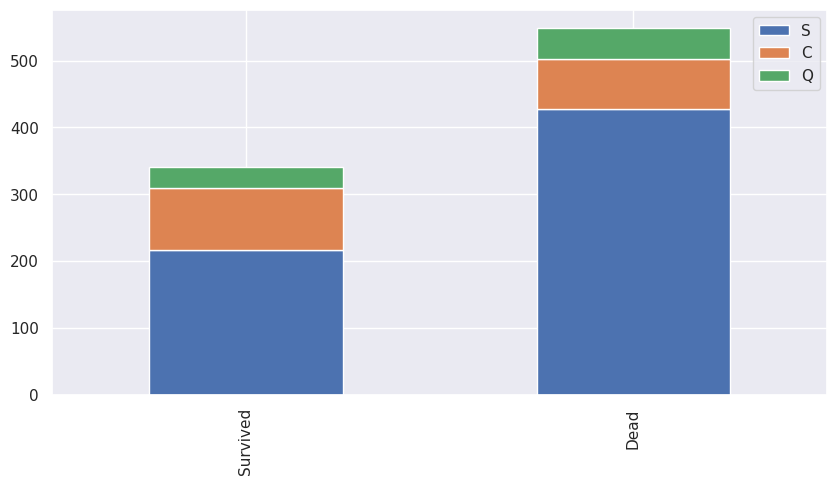

In [ ]:
# 사용
bar_chart(df,'Embarked')

In [ ]:
#kaggle에서 다른 분 전처리 보는 것도 좋음.

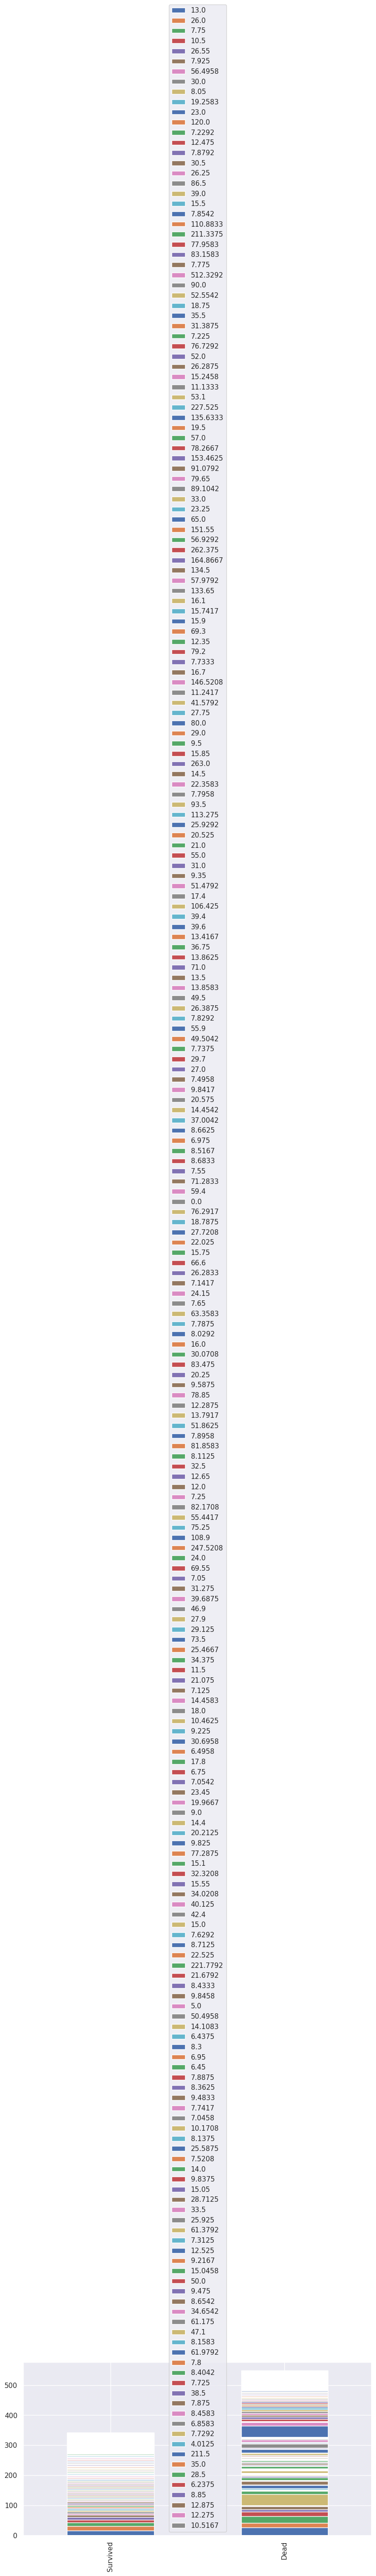

In [ ]:
# 사용
bar_chart(df,'Fare')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

## 2. Data Preprocessing

### 데이터 확인
- 각 데이터의 결측치, 비어있는 값 등을 확인해본다.
- 쓸모 없는 값은 버리거나(drop) 채우거나 ?
- 숫자 데이터가 아닌 값들은 숫자로 바꿔준다든지?

In [ ]:
X.Cabin.value_counts().sort_values()

B102           1
C99            1
B94            1
C87            1
D15            1
              ..
E101           3
F2             3
C23 C25 C27    4
G6             4
B96 B98        4
Name: Cabin, Length: 147, dtype: int64

In [ ]:
X.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
X_ = X.iloc[:,[0,2,3,4,5,7,9]]
X_.shape

(891, 7)

In [ ]:
# 상대적으로 연관성이 떨어지는 것들...을 빼버림.

In [ ]:
X_.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
X_.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
X.shape

(891, 10)

In [ ]:
X_.loc[:,'Age'] = X_['Age'].fillna(X_['Age'].mean())

<ipython-input-31-70a85d47a96e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_.loc[:,'Age'] = X_['Age'].fillna(X_['Age'].mean())


In [ ]:
X_.Embarked.value_counts().sort_values()

Q     77
C    168
S    644
Name: Embarked, dtype: int64

In [ ]:
X_.loc[:,'Embarked']=X_['Embarked'].fillna('S')
#fillna는 inplace 함수가 아니기 때문에 이를 명심해야 한다.

<ipython-input-33-f52f6d8be151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_.loc[:,'Embarked']=X_['Embarked'].fillna('S')


In [ ]:
X_.isnull().sum()
#전처리 할 때, 사용하지 않을 column들을 뺀다, null값을 대체해야 한다.

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
X_.loc[X_["Age"] <= 10, "age_group"] = "toddler"
X_.loc[X_["Age"].between(10, 20), "age_group"] = "teenage"
X_.loc[X_["Age"].between(20, 30), "age_group"] = "yadult"
X_.loc[X_["Age"].between(30, 40), "age_group"] = "adult"
X_.loc[X_["Age"].between(40, 50), "age_group"] = "older adult"
X_.loc[X_["Age"].between(50, 60), "age_group"] = "older_older_adult"
X_.loc[X_["Age"].between(60, 70), "age_group"] = "older_older_older_adult"
X_.loc[X_["Age"].between(70, 80), "age_group"] = "older_older_older_older_adult"
# X_
# SCQ 선착장을 분류해서 뽑았는데 C가 제일 확률이 높았다.

<ipython-input-35-515d24c5cac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_.loc[X_["Age"] <= 10, "age_group"] = "toddler"


In [ ]:
X_.Fare.describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# get_dummies를 이용해서 one-hot encoding을 해준다.
Pclass=pd.get_dummies(X_.Pclass)
Sex=pd.get_dummies(X_.Sex)
Embarked=pd.get_dummies(X_.Embarked)
Age_group = pd.get_dummies(X_.age_group)
Fare = pd.qcut(X_["Fare"], 5)
Fare_clean = Fare.astype("category").cat.codes
X_new = pd.concat([X_,Pclass],axis=1)
X_new = pd.concat([X_new,Sex],axis=1)
X_new = pd.concat([X_new,Embarked],axis=1)
X_new = pd.concat([X_new, Age_group], axis=1)
X_new = pd.concat([X_new, Fare_clean], axis=1)

In [ ]:
X_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_group,1,2,...,S,adult,older adult,older_older_adult,older_older_older_adult,older_older_older_older_adult,teenage,toddler,yadult,0
0,3,male,22.0,1,0,7.2500,S,yadult,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,female,38.0,1,0,71.2833,C,adult,1,0,...,0,1,0,0,0,0,0,0,0,4
2,3,female,26.0,0,0,7.9250,S,yadult,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,female,35.0,1,0,53.1000,S,adult,1,0,...,1,1,0,0,0,0,0,0,0,4
4,3,male,35.0,0,0,8.0500,S,adult,0,0,...,1,1,0,0,0,0,0,0,0,1


In [ ]:

del X_new["age_group"]

In [ ]:
X_new.head()

,Pclass,SibSp,Parch,1,2,3,female,male,C,Q,S,adult,older adult,older_older_adult,older_older_older_adult,older_older_older_older_adult,teenage,toddler,yadult,0
0,3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,4
2,3,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1
3,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,4
4,3,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
# 아래에서 어떤 오류가 발생한다면, 어떻게 처리해주면 좋을까요?

## Split into train, validation, test set
- 전처리를 끝내고 난 뒤에는 데이터를 train, validation, test set 으로 나눠준다.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#전체 데이터셋을 TRAIN + TEST 로 나눔
# 전체 data set을 (training + validation), test으로 나눔
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid =train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# 각 세트의 크기를 출력한다.
print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

size of training set: 498,  size of validation set: 214,  size of test set: 179


## 3. Test with validation set

In [ ]:
from sklearn.svm import SVC
best_score = 0
for _gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for _C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(gamma = _gamma, C = _C)
    svm.fit(X_train.values, y_train.values)
    score = svm.score(X_valid.values, y_valid.values)
    if score > best_score:
      best_score = score
      best_parameter = {"C":_C, "gamma":_gamma}
print(best_score)
print(best_parameter)

In [ ]:
# training set과 validation set을 합쳐 모델을 다시 만든 후
# test set을 이용하여 모델을 평가
svm  = SVC(**best_parameter)
svm.fit(X_train_val.values, y_train_val.values)
test_score = svm.score(X_test.values, y_test.values)
print(test_score)

## 4. Test with  Cross Validation
- 위의 결과를 참고해서 grid search를 진행합니다.
- parma_grid의 gamma와 C 값을 임의로 넣고 돌려보세요


In [ ]:
param_grid = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] ,
              'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] }
param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [ ]:
X_new.values

array([[3, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 4],
       [3, 0, 0, ..., 0, 1, 1],
       ...,
       [3, 1, 2, ..., 0, 1, 3],
       [1, 0, 0, ..., 0, 1, 3],
       [3, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# dtree classifer usage할 것.
# dt_clf = DecisionTreeClassifier(random_state=11)
scaler = StandardScaler()
grid_search = GridSearchCV(dt_clf, cv=5)

X_scaled = scaler.fit(X_new.values).transform(X_new.values)

# overfitting 방지를 위해 training, test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, random_state = 42)


# fit
grid_search.fit(X_train, y_train)


print("최적 매개변수 : ",grid_search.best_params_)
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

최적 매개변수 :  {'C': 10, 'gamma': 0.01}
최상 교차검증 점수 :  0.8248344742453148
최고 성능 모델 :  SVC(C=10, gamma=0.01)


### 결과 확인


In [ ]:
import pandas as pd
from IPython.display import display

results = pd.DataFrame(grid_search.cv_results_)
display(results)

In [ ]:
!pip install mglearn

In [ ]:
results.mean_test_score

In [ ]:
import mglearn
import matplotlib.pyplot as plt

scores = results.mean_test_score.to_numpy().reshape(10,10)
# reshape의  숫자는 gamma와 C 의 개수에 맞춰주세요

mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# Accuracy = ?
- grid_search.best_score_

In [ ]:
print(grid_search.best_score_)
print(svm.score(X_test, y_test))